In [1]:
import skimage.io
import skimage.color
import skimage.transform
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import os
import random

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [3]:
#######################################################
# - อ่านไฟล์ภาพ
# - resize ภาพให้มีขนาด 20x20x3
# - convert จาก RGB เป็น Gray scale
#######################################################

DATASET_DIR = (r'D:\LLPR\simple-car-plate-recognition-master\dataset\ann')

classes = os.listdir(DATASET_DIR)
data = []

for cls in classes:
  class_dir = os.path.join(DATASET_DIR, cls)
  files = os.listdir(class_dir)
  for f in files:
    img = skimage.io.imread(os.path.join(class_dir, f)) # อ่านพิกเซลของภาพ (พิกเซลมีค่า 0-255)
    img2 = skimage.transform.resize(img, (20,20,3)) # ปรับขนาดภาพเป็น 20x20 พิกเซล (พิกเซลมีค่า 0-1)
    img = skimage.color.rgb2gray(img2) # แปลงเป็น gray scale (พิกเซลมีค่า 0-1)
    img = skimage.util.invert(img) # กลับค่าสี (optional) (พิกเซลมีค่า 0-1)
    img = (img - img.min())/(img.max() - img.min()) # ปรับยืดความสว่างและมืดของภาพ (พิกเซลมีค่า 0-1)
    data.append({
        'x': img,
        'y': cls
    })
    print(F'{img.min()}, {img.max()}')
    
random.shuffle(data)

0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0

In [4]:
X = [d['x'] for d in data]
y = [d['y'] for d in data]

ys = list(np.unique(y))
y = [ys.index(v) for v in y]

x_train = np.array(X[:int(len(X)*0.8)])
y_train = np.array(y[:int(len(X)*0.8)])

x_test = np.array(X[int(len(X)*0.8):])
y_test = np.array(y[int(len(X)*0.8):])

In [5]:
batch_size = 128
num_classes = len(classes)
epochs = 200

# input image dimensions
img_rows, img_cols = 20, 20

In [6]:
num_classes

30

In [7]:
def extend_channel(data):
    if K.image_data_format() == 'channels_first':
        data = data.reshape(data.shape[0], 1, img_rows, img_cols)
    else:
        data = data.reshape(data.shape[0], img_rows, img_cols, 1)
        
    return data

x_train = extend_channel(x_train)
x_test = extend_channel(x_test)

input_shape = x_train.shape[1:]

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# ไม่ต้อง normalize ด้วย 255 แล้ว เพราะค่า x แต่ละพิกเซลมีค่าระหว่าง 0.0 - 1.0
#x_train /= 255
#x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train2 = keras.utils.to_categorical(y_train, num_classes)
y_test2 = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (1282, 20, 20, 1)
1282 train samples
321 test samples


In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

W0305 17:45:20.002470  9856 deprecation_wrapper.py:119] From C:\Users\Alex\AppData\Local\conda\conda\envs\mytensor\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0305 17:45:20.038450  9856 deprecation_wrapper.py:119] From C:\Users\Alex\AppData\Local\conda\conda\envs\mytensor\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0305 17:45:20.046443  9856 deprecation_wrapper.py:119] From C:\Users\Alex\AppData\Local\conda\conda\envs\mytensor\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0305 17:45:20.133411  9856 deprecation_wrapper.py:119] From C:\Users\Alex\AppData\Local\conda\conda\envs\mytensor\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. P

In [10]:
history = model.fit(x_train, y_train2,
          batch_size=batch_size,
          #epochs=1000,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test2))

W0305 17:45:26.413677  9856 deprecation.py:323] From C:\Users\Alex\AppData\Local\conda\conda\envs\mytensor\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1282 samples, validate on 321 samples
Epoch 1/200
1282/1282 [==============================] - 4s 3ms/step - loss: 3.0408 - acc: 0.1521 - val_loss: 2.7093 - val_acc: 0.2773
Epoch 2/200
1282/1282 [==============================] - 2s 2ms/step - loss: 2.3318 - acc: 0.4282 - val_loss: 2.1394 - val_acc: 0.3551
Epoch 3/200
1282/1282 [==============================] - 2s 2ms/step - loss: 1.5433 - acc: 0.6373 - val_loss: 2.0556 - val_acc: 0.5358
Epoch 4/200
1282/1282 [==============================] - 2s 2ms/step - loss: 1.2307 - acc: 0.6997 - val_loss: 0.8373 - val_acc: 0.8069
Epoch 5/200
1282/1282 [==============================] - 2s 2ms/step - loss: 0.7640 - acc: 0.8159 - val_loss: 0.6395 - val_acc: 0.8380
Epoch 6/200
1282/1282 [==============================] - 2s 2ms/step - loss: 0.6232 - acc: 0.8346 - val_loss: 0.6635 - val_acc: 0.7975
Epoch 7/200
1282/1282 [==============================] - 2s 2ms/step - loss: 0.5285 - acc: 0.8596 - val_loss: 0.3827 - val_acc: 0.9221
Epoch 8/

In [11]:
score = model.evaluate(x_test, y_test2, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2588426660190734
Test accuracy: 0.9657320872274143


In [0]:
model.save_weights('char_cnn.h5')

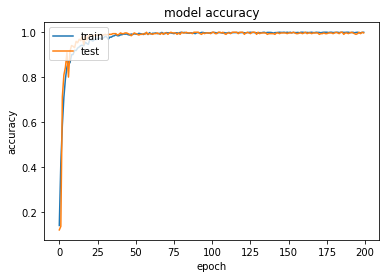

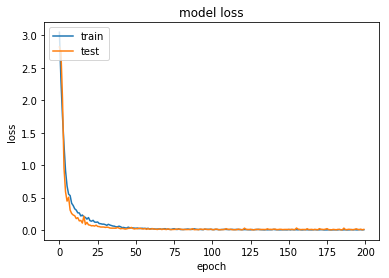

In [0]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

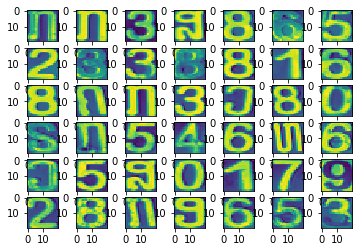

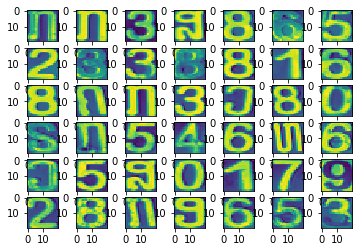

In [0]:
imgs_test = []
for i in range(42):
    imgs_test.append( x_test[i].reshape((20, 20)) )
    
skimage.io.imshow_collection(imgs_test)

In [0]:
#model.predict_classes(x_test)
print([ys[c] for c in model.predict_classes(x_test)])

['ກ', 'ກ', '3', 'ສ', '8', '6', '5', '2', '3', '3', '8', '8', '1', '6', '8', 'ຄ', 'ກ', '3', 'ວ', '8', '0', 'ຣ', 'ກ', '5', '4', '6', 'ຫ', '6', 'ວ', '5', 'ສ', '0', '1', '7', '9', '2', '8', 'ກ', 'ອ', '6', '5', '3', 'ຕ', 'ກ', '9', '5', '3', 'ກ', '7', '7', '2', 'ກ', '0', '8', '4', '7', 'ກ', '6', '8', 'ກ', '4', '2', '3', 'ມ', '9', '4', '8', 'ອ', '6', '0', '5', 'ກ', 'ຄ', 'ກ', '0', 'ກ', 'ຂ', 'ກ', '0', '8', '7', 'ຄ', 'ດ', '5', '2', '8', '5', 'ຮ', '2', '8', '7', '9', 'ກ', 'ຈ', '1', '3', 'ນ', '0', '6', 'ຍ', 'ຂ', 'ຜ', '9', 'ກ', 'ພ', '0', 'ດ', 'ກ', 'ຮ', 'ຍ', '6', '5', '8', '9', 'ນ', 'ກ', '3', '5', '1', '2', '1', '0', '3', '8', '0', '1', '7', '2', 'ກ', '4', '3', 'ກ', '0', '1', '4', 'ນ', '1', 'ພ', 'ຮ', '0', '6', '2', 'ຂ', '3', 'ຍ', '8', '4', '3', 'ດ', 'ກ', '1', '6', '3', '3', '8', '6', '0', 'ກ', '3', '9', '7', '6', '4', '9', '2', '1', '0', 'ຮ', '0', '8', 'ສ', 'ຄ', '5', 'ດ', 'ຜ', '2', 'ຄ', '9', '6', 'ກ', '6', 'ກ', '7', '5', '7', 'ຍ', '9', '9', '9', '0', 'ກ', 'ກ', 'ຜ', '7', 'ກ', '5', 'ຄ', 'ກ', '6', '9',

In [0]:
y_test

array([10, 10,  3, 26,  8,  6,  5,  2,  3,  3,  8,  8,  1,  6,  8, 12, 10,
        3, 25,  8,  0, 23, 10,  5,  4,  6, 27,  6, 25,  5, 26,  0,  1,  7,
        9,  2,  8, 10, 28,  6,  5,  3, 16, 10,  9,  5,  3, 10,  7,  7,  2,
       10,  0,  8,  4,  7, 10,  6,  8, 10,  4,  2,  3, 22,  9,  4,  8, 28,
        6,  0,  5, 10, 12, 10,  0, 10, 11, 10,  0,  8,  7, 12, 15,  5,  2,
        8,  5, 29,  2,  8,  7,  9, 10, 13,  1,  3, 18,  0,  6, 14, 11, 20,
        9, 10, 21,  0, 15, 10, 29, 14,  6,  5,  8,  9, 18, 10,  3,  5,  1,
        2,  1,  0,  3,  8,  0,  1,  7,  2, 10,  4,  3, 10,  0,  1,  4, 18,
        1, 21, 29,  0,  6,  2, 11,  3, 14,  8,  4,  3, 15, 10,  1,  6,  3,
        3,  8,  6,  0, 10,  3,  9,  7,  6,  4,  9,  2,  1,  0, 29,  0,  8,
       26, 12,  5, 15, 20,  2, 12,  9,  6, 10,  6, 10,  7,  5,  7, 14,  9,
        9,  9,  0, 10, 10, 20,  7, 10,  5, 12, 10,  6,  9, 20,  3, 11,  4,
        2,  6, 28,  8,  9,  9, 11, 11, 28, 15,  3,  2,  3, 13,  7,  4,  0,
        2,  5,  5,  1, 11

In [0]:
ys

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'ກ',
 'ຂ',
 'ຄ',
 'ຈ',
 'ຍ',
 'ດ',
 'ຕ',
 'ທ',
 'ນ',
 'ບ',
 'ຜ',
 'ພ',
 'ມ',
 'ຣ',
 'ລ',
 'ວ',
 'ສ',
 'ຫ',
 'ອ',
 'ຮ']